# Notebook Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Constants

In [3]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'


VOCAB_SIZE = 2500

# Load the Data

In [4]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities 
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')



# Calculating the Joint Probability

### The Dot Product

In [5]:
a = np.array([1,2,3])
b = np.array([0, 5, 4])
a.dot(b)

22

In [6]:
c = np.array([[0,6], [3, 0], [5, 1]])
print(c)

[[0 6]
 [3 0]
 [5 1]]


In [7]:
print(a.dot(c))

[21  9]


In [8]:
X_test.dot(prob_token_spam).shape

(1723,)

In [9]:
X_test.shape

(1723, 2500)

In [10]:
prob_token_spam.shape

(2500,)

In [11]:
PROB_SPAM = 0.3116

## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$

 # Joint Probability in log format

In [12]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [13]:
joint_log_spam[:5]

array([  3.27785918,  15.71807075,  19.5561439 , -16.3986471 ,
        28.63984293])

In [14]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1 - PROB_SPAM)

In [15]:
joint_log_ham[:5]

array([-11.08244838, -40.12603817, -38.48454145,  -2.88224864,
       -60.63643681])

In [16]:
joint_log_ham.size

1723

# Making Predictions

### Checking for the higher joint probability

$$P(Spam \, | \, x) \, > \, P(Ham \, | \, X)$$ 
<center><b>OR</b></center>
$$P(Spam \, | \, x) \, < \, P(Ham \, | \, X)$$ 

In [17]:
prediction = (joint_log_spam > joint_log_ham )

# Simplify

In [18]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

# Metrics and Evaluation

# Accurary

In [19]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)


Docs classified correctly 1673
Docs classified incorrectly 50


In [20]:
# Accuracy
correct_docs/len(X_test)

0.9709808473592572

In [21]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model us {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 2.90%
Accuracy of the model us 97.10%


# Visualising the Results

In [22]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

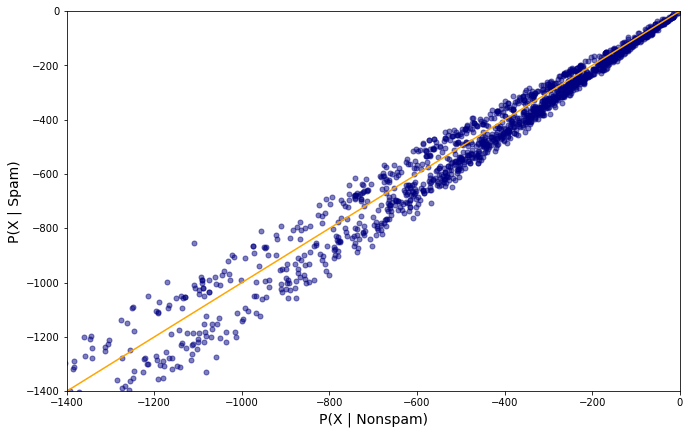

In [23]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-1400, 1])
plt.ylim([-1400, 1])


plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')
plt.show()

# The Decision Boundary

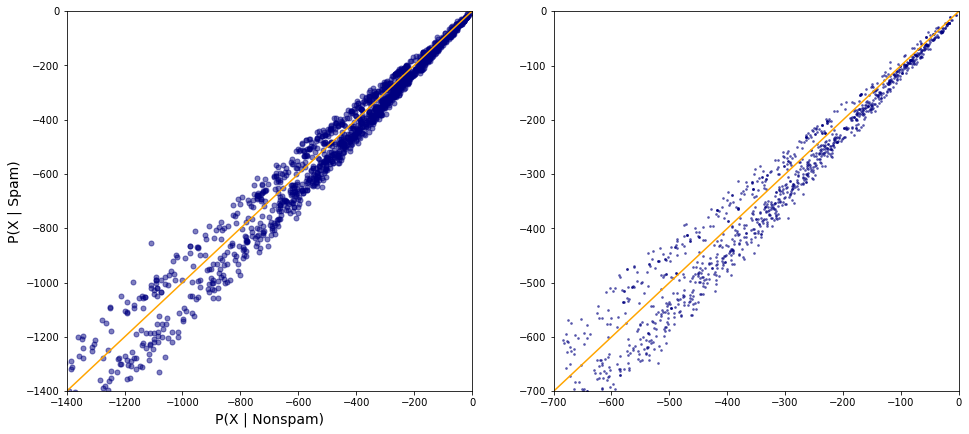

In [24]:
plt.figure(figsize=(16, 7))

# Chart Nr 1:
plt.subplot(1,2, 1)


plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-1400, 1])
plt.ylim([-1400, 1])


plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart Nr 2:
plt.subplot(1,2, 2)

plt.xlim([-700, 1])
plt.ylim([-700, 1])


plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')


plt.show()

In [25]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham,
                          labels: y_test})

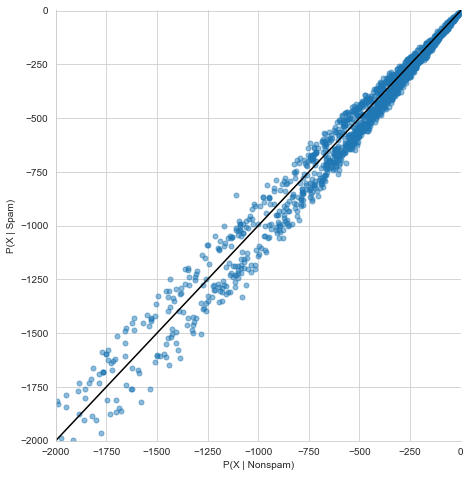

In [26]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False,
          scatter_kws={'alpha': 0.5, 's': 25})
plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.plot(linedata, linedata, color='black')

plt.show()


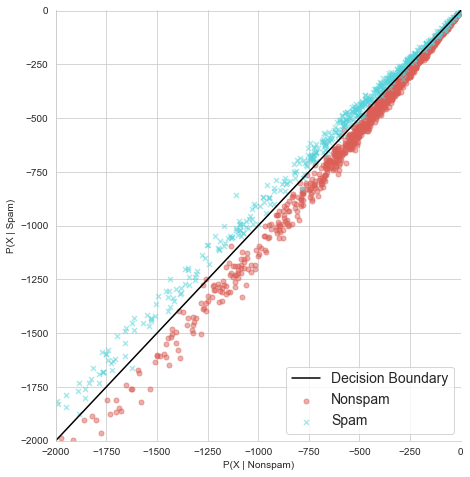

In [27]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False,
          scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls',legend=False)
plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()


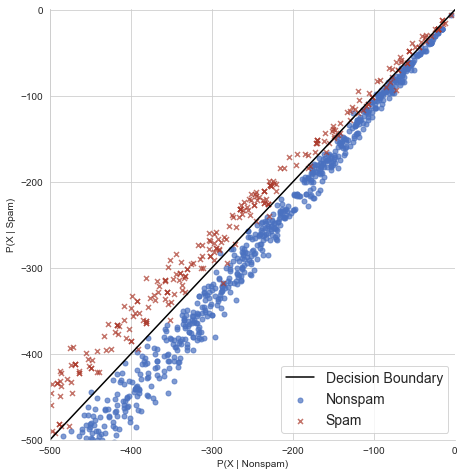

In [28]:
my_colours = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False,
          scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o', 'x'], palette=my_colours,legend=False)
plt.xlim([-500,1])
plt.ylim([-500,1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()


# False Positives and False Negatives

In [29]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1167,  556]))

In [30]:
true_pos = (y_test == 1) & (prediction == 1)

In [31]:
true_pos.sum()

547

In [32]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

9

In [33]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

41

 ## Recall Score

In [34]:
recall_score = (true_pos.sum()) / (true_pos.sum() + false_neg.sum())
print('The recall score is {:.2%}'.format(recall_score))

The recall score is 93.03%


## Precision Score

In [36]:
precision_score = (true_pos.sum()) / (true_pos.sum() + false_pos.sum())
print('Precision score : {:.3%}'.format(precision_score))

Precision score : 98.381%


## F-Score or F1 Score

In [37]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F1 score: {:.2}'.format(f1_score))

F1 score: 0.96
